Small Message Latency Loopback vs X-socket vs X-node (TODO add a 2 hop latency)

In [1]:
import matplotlib
import calchops
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
hostpath = "../results/summit/host/standard/ib/02-03-20.12.58.07/host"
devpath = "../results/summit/device/standard/ib/02-03-20.12.58.07/device"
f_loop = "ib_read_lat.loopback"
f_xsocket = "ib_read_lat.xsocket"
f_xnode = "ib_read_lat.xnode"
files = [f_loop, f_xsocket, f_xnode]

In [3]:
#output format is min, max, typical, avg, stddev, 99th, 99.9 
#unit is usec
def read_ib_lat(msg_size, file):
    data = {}
    with open(file, 'r') as f:
        for line in f.readlines():
            #print(line)
            tmp = line.lstrip().split()
            if tmp == []:
                continue
            elif tmp[0] == str(msg_size):
                data["tmin"] = tmp[2]
                data["tmax"] = tmp[3]
                data["tmed"] = tmp[4]
                data["tavg"] = tmp[5]
                data["tstd"] = tmp[6]
                return data
        return None

In [4]:
meds = []
minmax = []
for f in files:
    tmp = read_ib_lat(8, join(hostpath, f))
    print(tmp)
    meds += [float(tmp["tmed"])]
    minmax += [(float(tmp["tmin"]), float(tmp["tmax"]))]

{'tmin': '1.24', 'tmax': '1.32', 'tmed': '1.26', 'tavg': '1.26', 'tstd': '0.01'}
{'tmin': '1.24', 'tmax': '1.31', 'tmed': '1.25', 'tavg': '1.25', 'tstd': '0.01'}
{'tmin': '1.51', 'tmax': '1.59', 'tmed': '1.53', 'tavg': '1.54', 'tstd': '0.01'}


In [5]:
#Add these data points to compare DRAM vs HBM
f = f_xnode
tmp = read_ib_lat(8, join(devpath, f))
print(tmp)
meds += [float(tmp["tmed"])]
minmax += [(float(tmp["tmin"]), float(tmp["tmax"]))]

{'tmin': '1.76', 'tmax': '1.84', 'tmed': '1.78', 'tavg': '1.78', 'tstd': '0.01'}


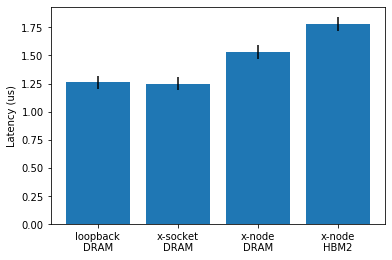

In [7]:
#This figure shows the difference that the wire and switch latency add for a single hop.
fig, ax = plt.subplots()
labels=["loopback\nDRAM", "x-socket\nDRAM", "x-node\nDRAM", "x-node\nHBM2"]
y_r = [meds[i] - minmax[i][1] for i in range(len(minmax))]
x = np.arange(len(labels))
ax.bar(range(len(meds)), meds, yerr=y_r, align='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.set_title("OFED perftest Read Latency for VERBS 8B get ops.\n Host controlled, DRAM and HBM")
ax.set_ylabel("Latency (us)")
plt.show()
fig.savefig("8B-ibverbs-host-dram-hbm-latency.png")

In [7]:
meds

[1.26, 1.25, 1.53, 1.78]

In [9]:
meds[2] - meds[1]

0.28

In [10]:
1/200000000

5e-09